In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text #to install make sure you do pip install highlight-text in your command line
from mplsoccer import Bumpy
import numpy as np

from PIL import Image
from io import BytesIO
import requests

In [2]:
df = pd.read_csv('La Liga.csv')

In [3]:
df.head()

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34
0,Alaves,14,18,19,20,17,19,15,15,15,...,18,19,18,19,20,19,19,18,16,16
1,Athletic Club,16,19,14,15,19,14,16,13,14,...,10,8,11,9,10,11,9,9,10,9
2,Atletico Madrid,4,4,2,5,5,4,3,2,1,...,1,1,1,1,1,1,1,1,1,1
3,Barcelona,1,1,1,1,1,1,5,6,5,...,2,2,2,2,2,3,3,3,3,3
4,Cadiz,18,11,15,10,10,8,7,7,7,...,15,14,14,15,13,12,13,13,13,12


In [4]:
#teams need to be column names while row names should be weeks
df = df.T

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Team,Alaves,Athletic Club,Atletico Madrid,Barcelona,Cadiz,Celta Vigo,Eibar,Elche,Getafe,Granada,Huesca,Levante,Osasuna,Real Betis,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
Week 1,14,16,4,1,18,12,13,20,19,6,11,15,5,7,3,8,17,2,10,9
Week 2,18,19,4,1,11,7,14,20,12,2,17,15,9,3,5,13,10,8,16,6
Week 3,19,14,2,1,15,8,18,20,11,6,17,10,13,5,3,7,4,9,16,12
Week 4,20,15,5,1,10,12,19,17,7,4,14,13,16,9,2,11,3,6,18,8


In [6]:
#reset the column names so that we drop the transposed team names
df.columns = df.iloc[0]
df = df.iloc[1:]

In [7]:
df.head()

Team,Alaves,Athletic Club,Atletico Madrid,Barcelona,Cadiz,Celta Vigo,Eibar,Elche,Getafe,Granada,Huesca,Levante,Osasuna,Real Betis,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
Week 1,14,16,4,1,18,12,13,20,19,6,11,15,5,7,3,8,17,2,10,9
Week 2,18,19,4,1,11,7,14,20,12,2,17,15,9,3,5,13,10,8,16,6
Week 3,19,14,2,1,15,8,18,20,11,6,17,10,13,5,3,7,4,9,16,12
Week 4,20,15,5,1,10,12,19,17,7,4,14,13,16,9,2,11,3,6,18,8
Week 5,17,19,5,1,10,13,14,18,11,4,15,16,12,6,2,7,3,9,20,8


In [8]:
week = ['Week ' + str(num) for num in range(1,35)]

In [9]:
#highlight dictionary to pass in the color. search team color codes in google to get your teams hex colors
highlight_dict = {
    'Atletico Madrid':'#CB3524',
    'Real Madrid':'white',
    'Barcelona':'#EDBB00'
}

In [10]:
bumpy = Bumpy(
    scatter_color = '#282828', line_color = '#252525',
    rotate_xticks=90,
    ticklabel_size = 15,
    scatter_primary = 'D',
    show_right = True,
    plot_labels = True,
    alignment_yvalue=.1,
    alignment_xvalue = .065
)

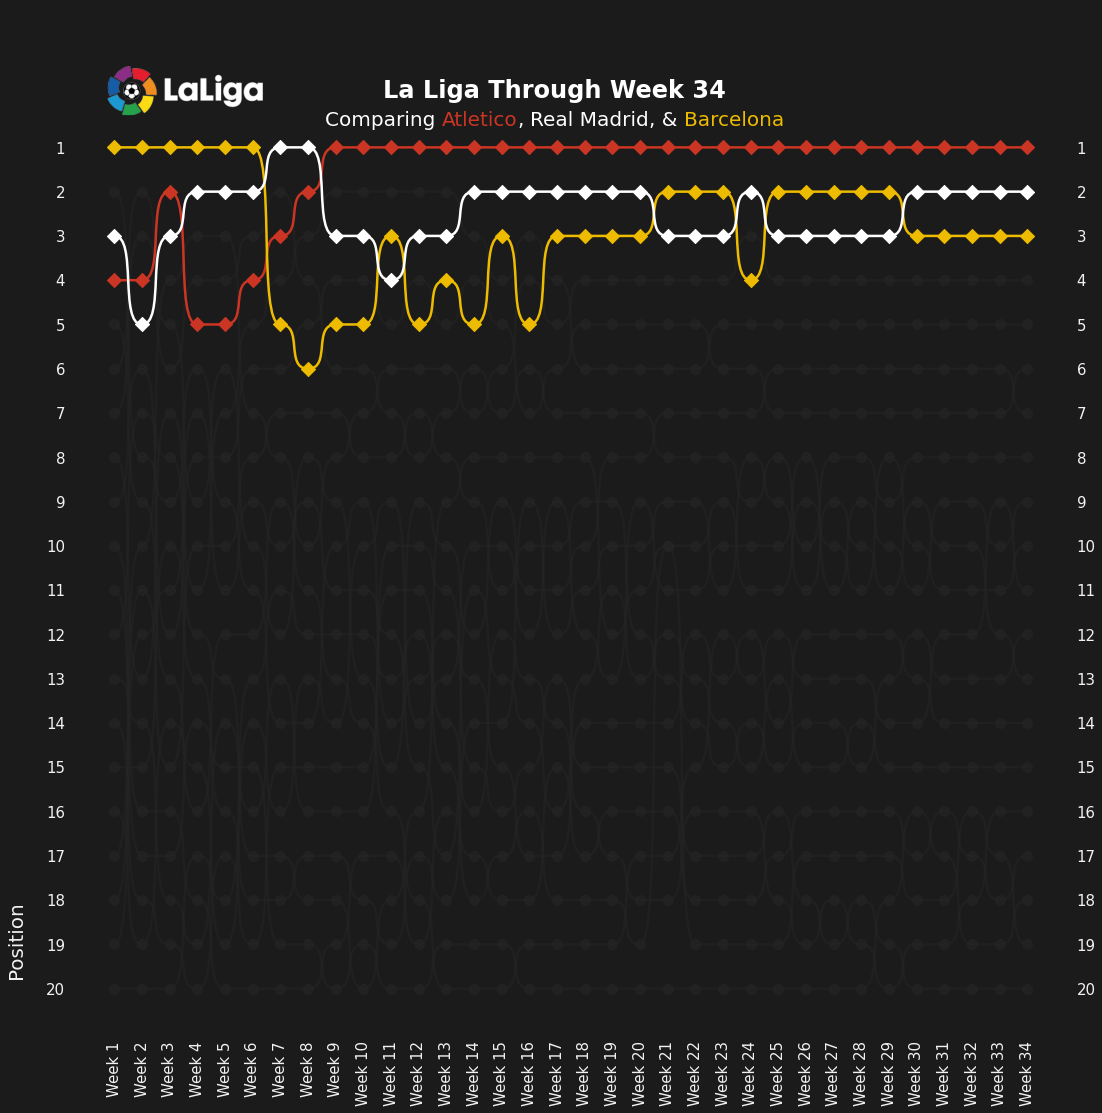

In [39]:
fig,ax = bumpy.plot(
    x_list = week,
    y_list = np.linspace(1,20,20).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (18,18),
    y_label = 'Position',
    ylim = (-.1,22),
    lw = 2.5
)

fig.text(s = 'La Liga Through Week 34',x = .5, y = .85,
         c = 'white',size=24,weight='bold',ha='center'
        )

highlight_text.fig_text(x=.5, y= .84, 
                       s = 'Comparing <Atletico>, <Real Madrid>, & <Barcelona>',
                       highlight_textprops = [
                           {"color":'#CB3524'},
                           {"color":'white'},
                           {"color":'#EDBB00'}  
                       ],
                        fontsize = 20,
                        color = 'white',
                        ha='center'
                       )

ax2 = fig.add_axes([.15,.79,.13,.13])
ax2.axis('off')
img = Image.open('laligalogo.png')
ax2.imshow(img)